In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../")
import nrv

nrv.parameters.set_nrv_verbosity(3)

## Nerve creation

In [2]:
outer_d = 5 # mm
nerve_d = 500 # um
nerve_l = 5000 # um

fasc1_d = 200 # um
fasc1_y = -100
fasc1_z = 0

fasc2_d = 100 # um
fasc2_y = 100
fasc2_z = 0

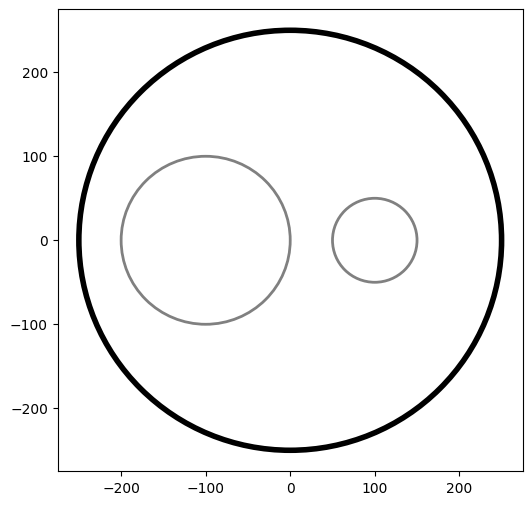

In [3]:
nerve = nrv.nerve(length=nerve_l, diameter=nerve_d, Outer_D=outer_d)


fascicle_1 = nrv.fascicle(diameter=fasc1_d,ID=1)      
fascicle_2 = nrv.fascicle(diameter=fasc2_d, ID=2)

nerve.add_fascicle(fascicle=fascicle_1, y=fasc1_y, z=fasc1_z)
nerve.add_fascicle(fascicle=fascicle_2, y=fasc2_y, z=fasc2_z)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve.plot(ax)

## Add axon population

NRV INFO: On 100 axons to generate, there are 30 Myelinated and 70 Unmyelinated
NRV INFO: Axon packing initiated. This might take a while...


100%|██████████| 20000/20000 [00:03<00:00, 6207.69it/s]


NRV INFO: Packing done!
NRV INFO: On 100 axons to generate, there are 30 Myelinated and 70 Unmyelinated
NRV INFO: Axon packing initiated. This might take a while...


100%|██████████| 20000/20000 [00:02<00:00, 6756.43it/s]


NRV INFO: Packing done!
NRV WARNING: 18 outlier axons discarded.


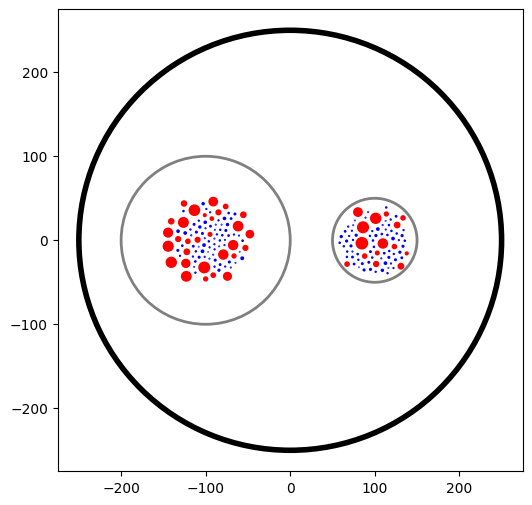

In [4]:
n_ax1 = 100
axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax1, percent_unmyel=0.7, M_stat="Ochoa_M", U_stat="Ochoa_U",)
fascicle_1.fill_with_population(axons_diameters, axons_type, delta=5)

n_ax1 = 100
axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax1, percent_unmyel=0.7, M_stat="Ochoa_M", U_stat="Ochoa_U",)
fascicle_2.fill_with_population(axons_diameters, axons_type, delta=5)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve.plot(ax)


# blabla

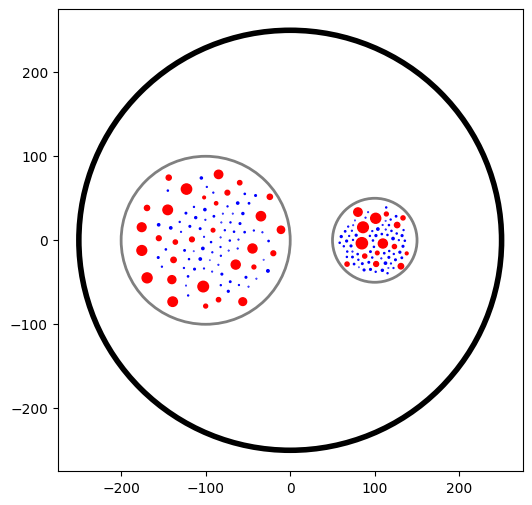

In [5]:
fascicle_1.fit_population_to_size(delta = 1)        #else set True in fill_with_population - Note: Pb with "barycenter"
fig, ax = plt.subplots(1, 1, figsize=(6,6))     
nerve.plot(ax)

Setting axon model parameters - see tuto 1 and 2 for full model specification

In [28]:
m_model = 'MRG'
um_model = 'Rattay_Aberham'
u_param = {"model": "Rattay_Aberham"}
m_param = {"model": "MRG"}

#For fascicle1
fascicle_1.set_axons_parameters(unmyelinated_only=True,**u_param)
fascicle_1.set_axons_parameters(myelinated_only=True,**m_param)

#For fascicle2
fascicle_2.set_axons_parameters(unmyelinated_only=True,**u_param)
fascicle_2.set_axons_parameters(myelinated_only=True,**m_param)

##Extraccelullar context for FEM

In [ ]:
#Create an extracellular context for the FEM sim + define materials
extra_stim = nrv.FEM_stimulation(endo_mat = "endoneurium_ranck",
                                peri_mat = "perineurium",
                                epi_ma = "epineurium",
                                ext_mat =  "saline")    #

## adding electrodes 

In [6]:
life_d = 25
life_length = 1000
life_x_offset = (nerve_l-life_length)/2

life_y_c_0 = 0
life_z_c_0 = 100
life_y_c_1 = fasc1_y
life_z_c_1 = fasc1_z
life_y_c_2 = fasc2_y
life_z_c_2 = fasc2_z

dummy_stim = nrv.stimulus()
dummy_stim.pulse(0, 0.1, 1)

# LIFE in neither of the two fascicles
elec_0 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_offset, life_y_c_0, life_z_c_0, ID = 0)
extra_stim.add_electrode(elec_0, dummy_stim)

# LIFE in the fascicle 1
elec_1 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_offset, life_y_c_1, life_z_c_1, ID = 1)
extra_stim.add_electrode(elec_1, dummy_stim)

# LIFE in the fascicle 2
elec_2 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_offset, life_y_c_2, life_z_c_2, ID = 2)
extra_stim.add_electrode(elec_2, dummy_stim)

nerve.attach_extracellular_stimulation(extra_stim)


NRV INFO: From Fascicle 1: Electrode/Axons overlap, 3 axons will be removed from the fascicle
NRV INFO: 100 axons remaining
NRV INFO: From Fascicle 2: Electrode/Axons overlap, 9 axons will be removed from the fascicle
NRV INFO: 82 axons remaining


Let's see how our nerve now looks like:

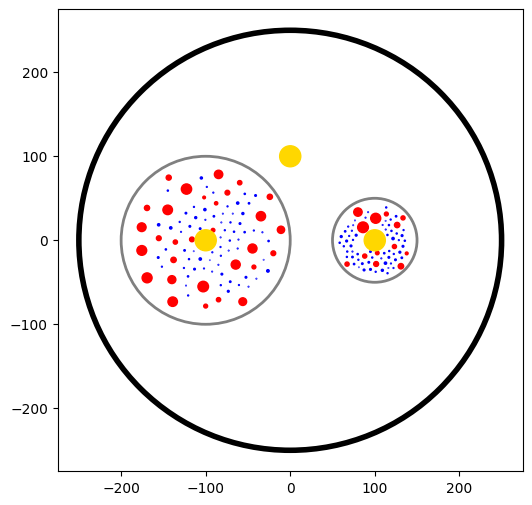

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve.plot(ax)

## Alright now it's time to run some real simulations!

In [8]:
nerve.save_results = False
nerve.return_parameters_only = False
nerve.verbose = True
nerve_results = nerve.simulate(t_sim=1,postproc_script = "AP_detection")#, save_path='./', postproc_script="default", )

NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: Mesh properties:
NRV INFO: Number of processes : 3
NRV INFO: Number of entities : 63
NRV INFO: Number of nodes : 20850
NRV INFO: Number of elements : 147018
NRV INFO: Static/Quasi-Static electrical current problem
NRV INFO: FEN4NRV: setup the bilinear form
NRV INFO: FEN4NRV: setup the linear form
NRV INFO: FEN4NRV: solving electrical potential
NRV INFO: FEN4NRV: solved in 27.785598278045654 s
NRV INFO: Static/Quasi-Static electrical current problem
NRV INFO: FEN4NRV: solving electrical potential
NRV INFO: FEN4NRV: solved in 51.59862923622131 s
NRV INFO: Static/Quasi-Static electrical current problem
NRV INFO: FEN4NRV: solving electrical potential
NRV INFO: FEN4NRV: solved in 74.89209032058716 s
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!


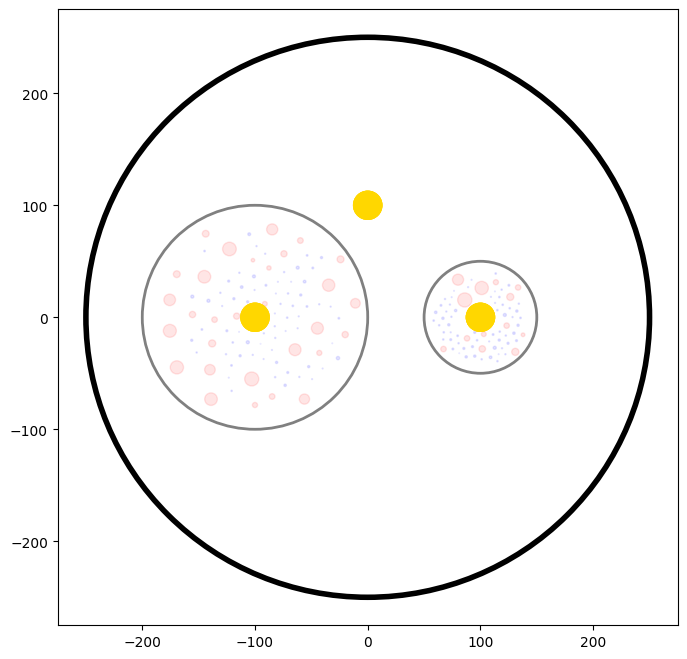

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
nerve_results.plot_recruited_fibers(ax)


No fiber activated, of course no stimulus. Lets apply a stmulus to LIFE2 (in fascicle 2)

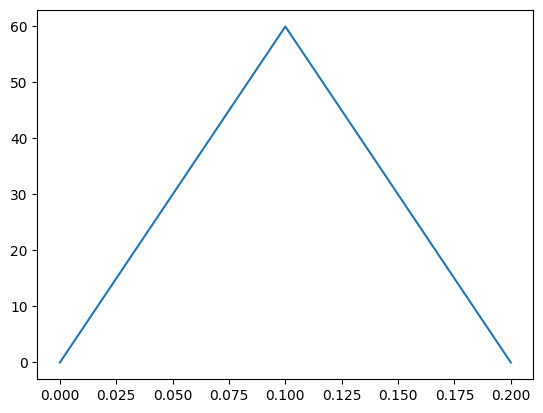

In [18]:
t_start = 0.1       #start of the pulse, in ms
t_pulse = 0.1       #duration of the pulse, in ms
amp_pulse = 60     #amplitude of the pulse, in uA 

pulse_stim = nrv.stimulus()
pulse_stim.pulse(t_start, -amp_pulse, t_pulse)      #cathodic pulse
plt.figure()
plt.plot(pulse_stim.t,pulse_stim.s) #@TODO!!

NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!


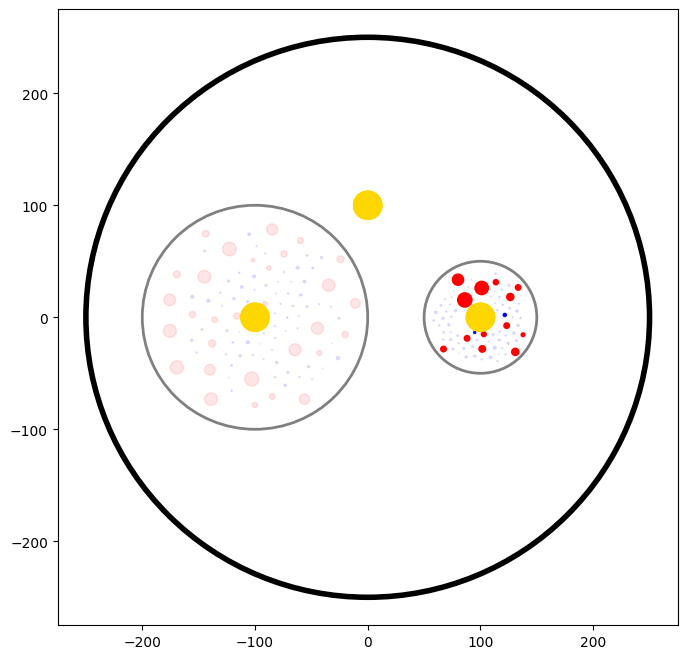

In [10]:
t_start = 0.1       #start of the pulse, in ms
t_pulse = 0.1       #duration of the pulse, in ms
amp_pulse = 60     #amplitude of the pulse, in uA 

pulse_stim = nrv.stimulus()
pulse_stim.pulse(t_start, amp_pulse, t_pulse)
nerve.change_stimulus_from_elecrode(ID_elec=2,stimulus=pulse_stim)

nerve_results = nerve.simulate(t_sim=3,postproc_script = "AP_detection")
fig, ax = plt.subplots(figsize=(8, 8))
nerve_results.plot_recruited_fibers(ax)

Now we see some activation some fibers beeing activated!! Note that FEM is not recomputed (same geometry)

NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!


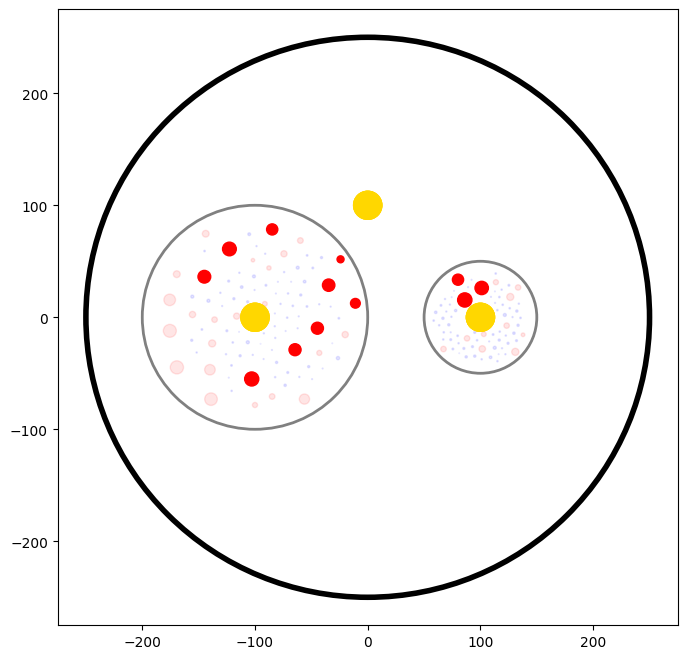

In [11]:
nerve.change_stimulus_from_elecrode(ID_elec=0,stimulus=pulse_stim)
nerve.change_stimulus_from_elecrode(ID_elec=2,stimulus=dummy_stim)

nerve_results = nerve.simulate(t_sim=3,postproc_script = "AP_detection")
fig, ax = plt.subplots(figsize=(8, 8))
nerve_results.plot_recruited_fibers(ax)
#@Todo: print how many fibers are recruited in each fascicle

## Recruitment curves



In [21]:
amp_min = 0
amp_max = 150
n_amp = 20
amp_vec = np.linspace(amp_min,amp_max,n_amp)


def get_recruitment_electrode(elec_ID:int, amp_vec:np.array) -> list:

    nerve.verbose = False
    unmyel_fasc1,myel_fasc1,unmyel_fasc2,myel_fasc2 = ([] for i in range(4))
    elec_IDs = [0,1,2]
    unused_elec = [x for x in elec_IDs if elec_ID != x]
    #Deactivate unused electrodes
    for elec in unused_elec:
        nerve.change_stimulus_from_elecrode(ID_elec=elec,stimulus=dummy_stim)   
    print(f"Stimulating nerve with LIFE{elec_ID}")
    for idx,amp in enumerate(amp_vec):
        print(f"Pulse amplitude set to {-amp}µA ({idx+1}/{len(amp_vec)})")
        pulse_stim = nrv.stimulus()
        pulse_stim.pulse(t_start, -amp, t_pulse)
        nerve.change_stimulus_from_elecrode(ID_elec=elec_ID,stimulus=pulse_stim)    #attach stimulus to selected electrode
        nerve_results = nerve(t_sim=3,postproc_script = "AP_detection")             #run simulation

        #Get results
        fasc_results = nerve_results.get_fascicle_results(ID = 1)
        unmyel_fasc1.append(fasc_results.get_recruited_axons('unmyelinated'))
        myel_fasc1.append(fasc_results.get_recruited_axons('myelinated'))
        fasc_results = nerve_results.get_fascicle_results(ID = 2)
        unmyel_fasc2.append(fasc_results.get_recruited_axons('unmyelinated'))
        myel_fasc2.append(fasc_results.get_recruited_axons('myelinated'))
    return(unmyel_fasc1,myel_fasc1,unmyel_fasc2,myel_fasc2)


unmyel_fasc1_LIFE0,myel_fasc1_LIFE0,unmyel_fasc2_LIFE0, myel_fasc2_LIFE0 = get_recruitment_electrode(0,amp_vec)
unmyel_fasc1_LIFE1,myel_fasc1_LIFE1,unmyel_fasc2_LIFE1, myel_fasc2_LIFE1 = get_recruitment_electrode(1,amp_vec)
unmyel_fasc1_LIFE2,myel_fasc1_LIFE2,unmyel_fasc2_LIFE2, myel_fasc2_LIFE2 = get_recruitment_electrode(2,amp_vec)




NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!
NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!
NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!
NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!
NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!
NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV I

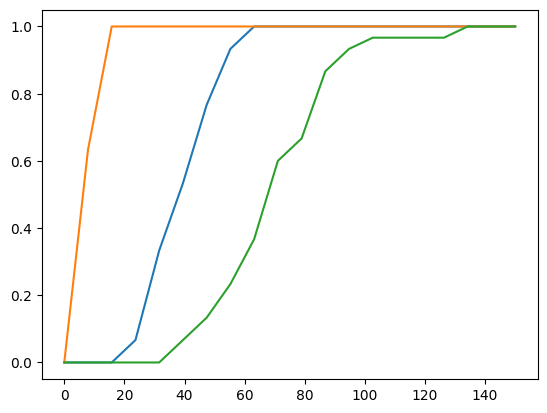

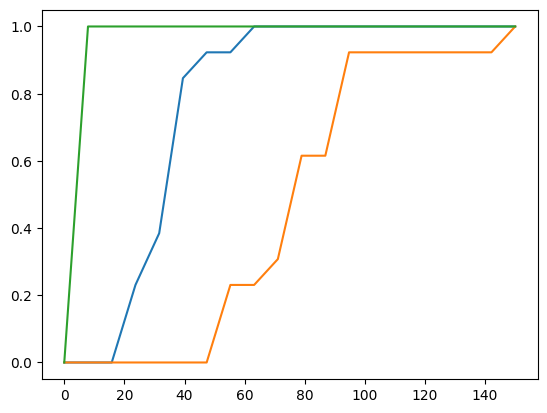

In [25]:

plt.figure()
plt.plot(amp_vec,myel_fasc1_LIFE0)
plt.plot(amp_vec,myel_fasc1_LIFE1)
plt.plot(amp_vec,myel_fasc1_LIFE2)

plt.figure()
plt.plot(amp_vec,myel_fasc2_LIFE0)
plt.plot(amp_vec,myel_fasc2_LIFE1)
plt.plot(amp_vec,myel_fasc2_LIFE2)
